In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math


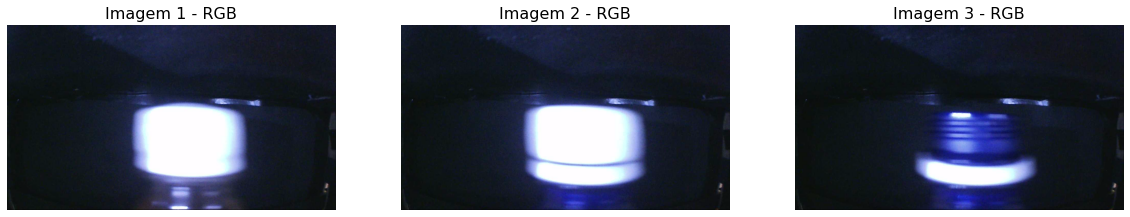

In [19]:
imgRGB1 = cv2.imread('../Imagens/img29.png',1) #img29
imgRGB2 = cv2.imread('../Imagens/img42.png',1) #img38
imgRGB3 = cv2.imread('../Imagens/img52.png',1) #img46

fig1 = plt.figure(figsize=(20,5))

ax1 = fig1.add_subplot(131)
ax1.set_title('Imagem 1 - RGB', size=16)
ax1.axis("off")
ax1.imshow(cv2.cvtColor(imgRGB1, cv2.COLOR_BGR2RGB))

ax2 = fig1.add_subplot(132)
ax2.set_title('Imagem 2 - RGB', size=16)
ax2.axis("off")
ax2.imshow(cv2.cvtColor(imgRGB2, cv2.COLOR_BGR2RGB))

ax3 = fig1.add_subplot(133)
ax3.set_title('Imagem 3 - RGB', size=16)
ax3.axis("off")
ax3.imshow(cv2.cvtColor(imgRGB3, cv2.COLOR_BGR2RGB))

plt.show()

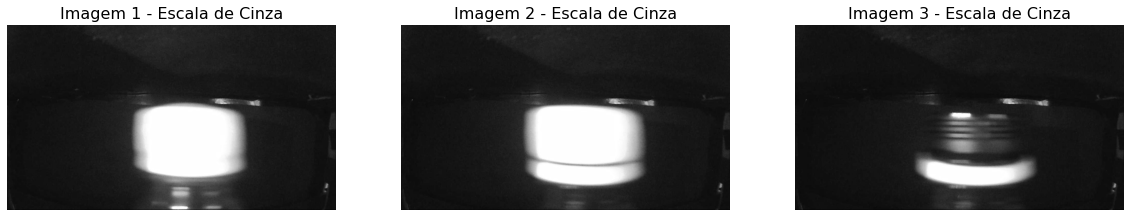

In [20]:
imgGray1 = cv2.imread('../Imagens/img29.png',0)
imgGray2 = cv2.imread('../Imagens/img42.png',0)
imgGray3 = cv2.imread('../Imagens/img52.png',0)

fig1 = plt.figure(figsize=(20,5))

ax1 = fig1.add_subplot(131)
ax1.set_title('Imagem 1 - Escala de Cinza', size=16)
ax1.axis("off")
ax1.imshow(imgGray1,cmap=(plt.cm.gray))

ax2 = fig1.add_subplot(132)
ax2.set_title('Imagem 2 - Escala de Cinza', size=16)
ax2.axis("off")
ax2.imshow(imgGray2,cmap=(plt.cm.gray))

ax3 = fig1.add_subplot(133)
ax3.set_title('Imagem 3 - Escala de Cinza', size=16)
ax3.axis("off")
ax3.imshow(imgGray3,cmap=(plt.cm.gray))

plt.show()

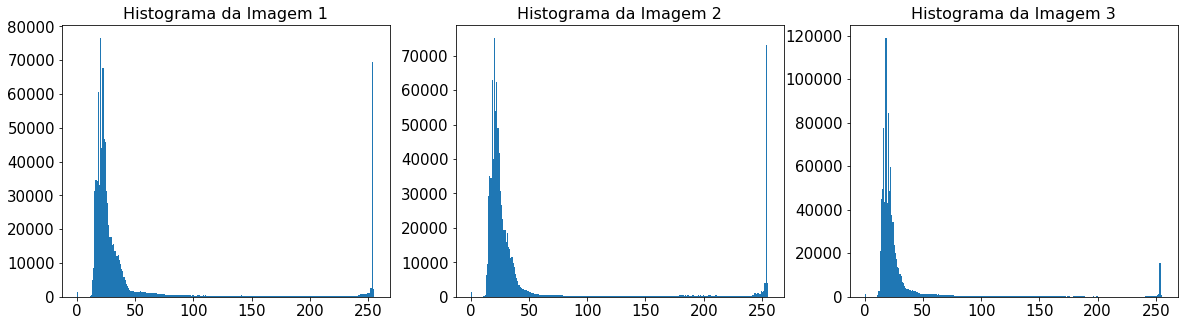

In [21]:
fig1 = plt.figure(figsize=(20,5))

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15


ax1 = fig1.add_subplot(131)
ax1.set_title('Histograma da Imagem 1', size = 16)
plt.hist(imgGray1.ravel(), 256, [0,256])

ax2 = fig1.add_subplot(132)
ax2.set_title('Histograma da Imagem 2', size = 16)
plt.hist(imgGray2.ravel(), 256, [0,256])

ax3 = fig1.add_subplot(133)
ax3.set_title('Histograma da Imagem 3', size = 16)
plt.hist(imgGray3.ravel(), 256, [0,256])

plt.show()

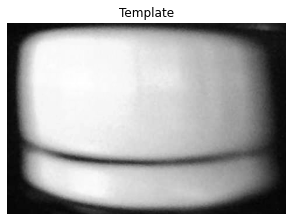

In [23]:
template = cv2.imread('../Imagens/NCC_2.png',0)

w,h = template.shape[::-1] 

fig1 = plt.figure(figsize=(5,5))

ax1 = fig1.add_subplot(111)
ax1.title.set_text('Template')
ax1.axis("off")
ax1.imshow(template,cmap=(plt.cm.gray))

plt.show()


min_val1: -0.45591896772384644
max_val1: 0.8728195428848267
min_loc1: (93, 320)
max_loc1: (483, 296)
min_val2: -0.4769856929779053
max_val2: 0.930286705493927
min_loc2: (83, 271)
max_loc2: (481, 306)
min_val3: -0.4108109772205353
max_val3: 0.40425997972488403
min_loc3: (82, 63)
max_loc3: (476, 393)


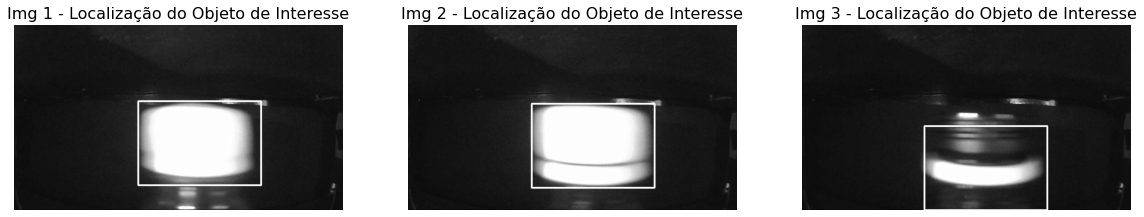

In [24]:
img1 = imgGray1.copy()
img2 = imgGray2.copy()
img3 = imgGray3.copy()

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

res1 = cv2.matchTemplate(img1,template,eval(methods[1]))
res2 = cv2.matchTemplate(img2,template,eval(methods[1]))
res3 = cv2.matchTemplate(img3,template,eval(methods[1]))

min_val1, max_val1, min_loc1, max_loc1 = cv2.minMaxLoc(res1)
min_val2, max_val2, min_loc2, max_loc2 = cv2.minMaxLoc(res2)
min_val3, max_val3, min_loc3, max_loc3 = cv2.minMaxLoc(res3)

top_left1 = max_loc1
top_left2 = max_loc2
top_left3 = max_loc3

bottom_right1 = (top_left1[0] + w, top_left1[1] + h)
cv2.rectangle(img1,top_left1, bottom_right1, 255, 5)

bottom_right2 = (top_left2[0] + w, top_left2[1] + h)
cv2.rectangle(img2,top_left2, bottom_right2, 255, 5)

bottom_right3 = (top_left3[0] + w, top_left3[1] + h)
cv2.rectangle(img3,top_left3, bottom_right3, 255, 5)

fig1 = plt.figure(figsize=(20,5))

ax1 = fig1.add_subplot(131)
ax1.set_title('Img 1 - Localização do Objeto de Interesse', size=16)
ax1.axis("off")
ax1.imshow(img1,cmap=(plt.cm.gray))
print('min_val1: ' + str(min_val1))
print('max_val1: ' + str(max_val1))
print('min_loc1: ' + str(min_loc1))
print('max_loc1: ' + str(max_loc1))

ax2 = fig1.add_subplot(132)
ax2.set_title('Img 2 - Localização do Objeto de Interesse', size=16)
ax2.axis("off")
ax2.imshow(img2,cmap=(plt.cm.gray))
print('min_val2: ' + str(min_val2))
print('max_val2: ' + str(max_val2))
print('min_loc2: ' + str(min_loc2))
print('max_loc2: ' + str(max_loc2))

ax3 = fig1.add_subplot(133)
ax3.set_title('Img 3 - Localização do Objeto de Interesse', size=16)
ax3.axis("off")
ax3.imshow(img3,cmap=(plt.cm.gray))
print('min_val3: ' + str(min_val3))
print('max_val3: ' + str(max_val3))
print('min_loc3: ' + str(min_loc3))
print('max_loc3: ' + str(max_loc3))

plt.show()


Se max_val1 for menor que 0.60, a garrafa está sem tampa.

In [25]:
print(top_left1)
print(bottom_right1)

(483, 296)
(961, 623)


min_val1: -0.45591896772384644
max_val1: 0.8728195428848267
min_loc1: (93, 320)
max_loc1: (483, 296)
min_val2: -0.4769856929779053
max_val2: 0.930286705493927
min_loc2: (83, 271)
max_loc2: (481, 306)


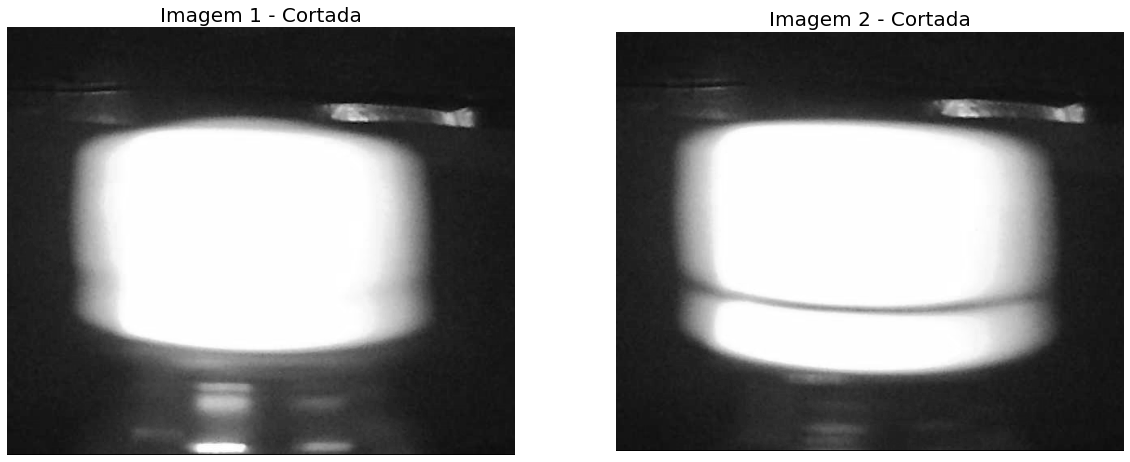

In [26]:
seg = 75

cropped1 = imgGray1[top_left1[1]-(seg+30):bottom_right1[1]+(seg+30),top_left1[0]-seg:bottom_right1[0]+seg]
cropped2 = imgGray2[top_left2[1]-(seg+30):bottom_right2[1]+(seg+30),top_left2[0]-seg:bottom_right2[0]+seg]

fig1 = plt.figure(figsize=(20,10))

ax1 = fig1.add_subplot(121)
ax1.set_title('Imagem 1 - Cortada', size=20)
ax1.axis("off")
ax1.imshow(cropped1,cmap=(plt.cm.gray))
print('min_val1: ' + str(min_val1))
print('max_val1: ' + str(max_val1))
print('min_loc1: ' + str(min_loc1))
print('max_loc1: ' + str(max_loc1))

ax2 = fig1.add_subplot(122)
ax2.set_title('Imagem 2 - Cortada', size=20)
ax2.axis("off")
ax2.imshow(cropped2,cmap=(plt.cm.gray))
print('min_val2: ' + str(min_val2))
print('max_val2: ' + str(max_val2))
print('min_loc2: ' + str(min_loc2))
print('max_loc2: ' + str(max_loc2))

plt.show()

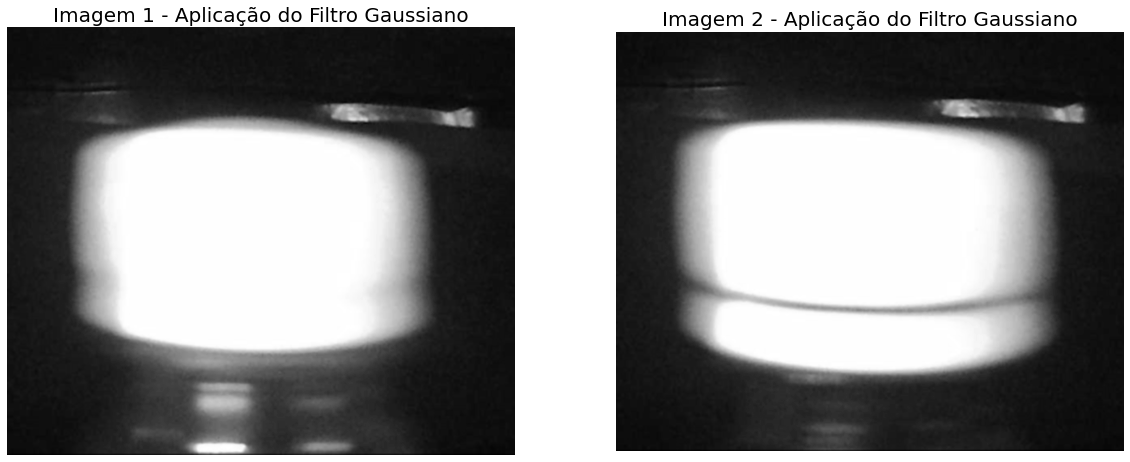

In [27]:
#Apply Gaussian Blur to the image

g = (3,3)

filter1 = cv2.GaussianBlur(cropped1, g, 0)
filter2 = cv2.GaussianBlur(cropped2, g, 0)

fig1 = plt.figure(figsize=(20,10))

ax1 = fig1.add_subplot(121)
ax1.set_title('Imagem 1 - Após a aplicação do Filtro Gaussiano', size=20)
ax1.title.set_text('Imagem 1 - Aplicação do Filtro Gaussiano')
ax1.axis("off")
ax1.imshow(filter1,cmap=(plt.cm.gray))

ax2 = fig1.add_subplot(122)
ax2.set_title('Imagem 2 - Aplicação do Filtro Gaussiano', size=20)
ax2.axis("off")
ax2.imshow(filter2,cmap=(plt.cm.gray))

plt.show()

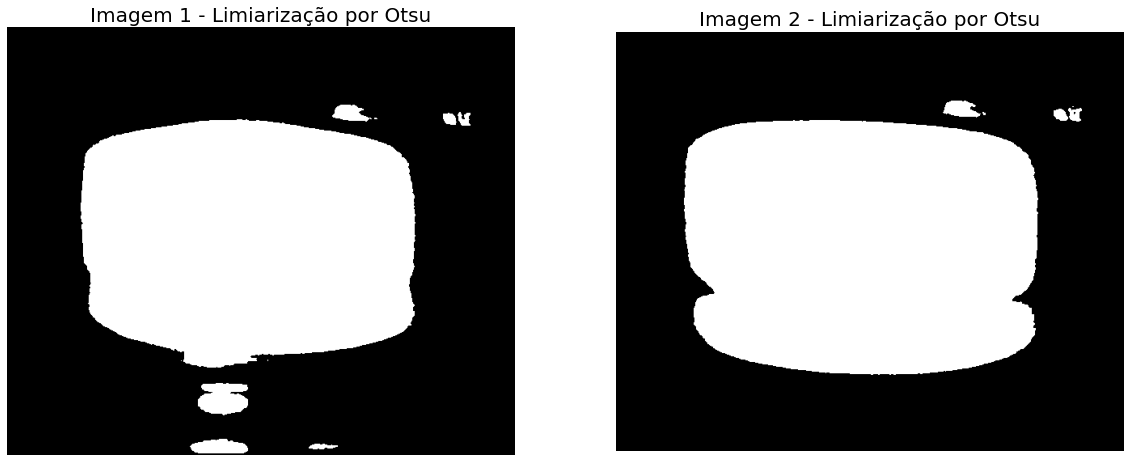

Limiar Imagem 1: 138.0
Limiar Imagem 1: 136.0


In [28]:
ret1, otsu1 = cv2.threshold(filter1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2, otsu2 = cv2.threshold(filter2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

fig1 = plt.figure(figsize=(20,10))

ax1 = fig1.add_subplot(121)
ax1.set_title('Imagem 1 - Limiarização por Otsu', size=20)
ax1.axis("off")
ax1.imshow(otsu1,cmap=(plt.cm.gray))

ax2 = fig1.add_subplot(122)
ax2.set_title('Imagem 2 - Limiarização por Otsu', size=20)
ax2.axis("off")
ax2.imshow(otsu2,cmap=(plt.cm.gray))

plt.show()

print ("Limiar Imagem 1: " + str(ret1))
print ("Limiar Imagem 1: " + str(ret2))

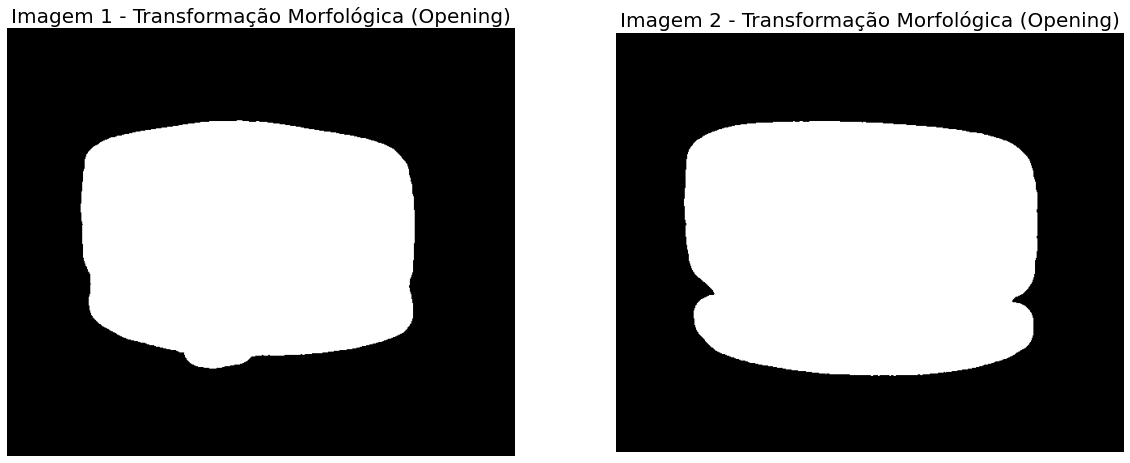

In [29]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (45,45))

opening1 = cv2.morphologyEx(otsu1, cv2.MORPH_OPEN, kernel)
opening2 = cv2.morphologyEx(otsu2, cv2.MORPH_OPEN, kernel)

fig1 = plt.figure(figsize=(20,10))

ax1 = fig1.add_subplot(121)
ax1.set_title('Imagem 1 - Transformação Morfológica (Opening)', size=20)
ax1.axis("off")
ax1.imshow(opening1,cmap=(plt.cm.gray))

ax2 = fig1.add_subplot(122)
ax2.set_title('Imagem 2 - Transformação Morfológica (Opening)', size=20)
ax2.axis("off")
ax2.imshow(opening2,cmap=(plt.cm.gray))


plt.show()

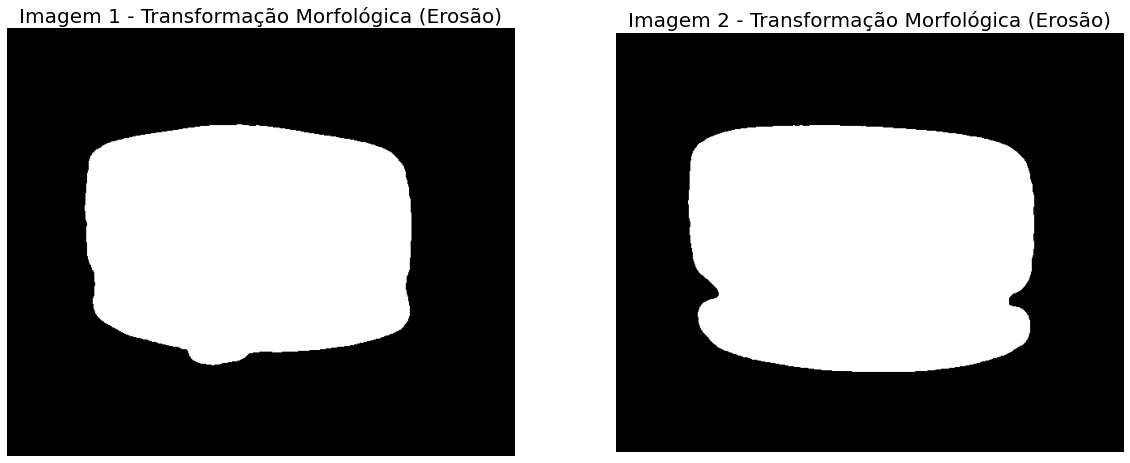

In [30]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))

erode1 = cv2.erode(opening1,kernel,2)
erode2 = cv2.erode(opening2,kernel,2)

fig1 = plt.figure(figsize=(20,10))

ax1 = fig1.add_subplot(121)
ax1.set_title('Imagem 1 - Transformação Morfológica (Erosão)', size=20)
ax1.axis("off")
ax1.imshow(erode1,cmap=(plt.cm.gray))

ax2 = fig1.add_subplot(122)
ax2.set_title('Imagem 2 - Transformação Morfológica (Erosão)', size=20)
ax2.axis("off")
ax2.imshow(erode2,cmap=(plt.cm.gray))


plt.show()

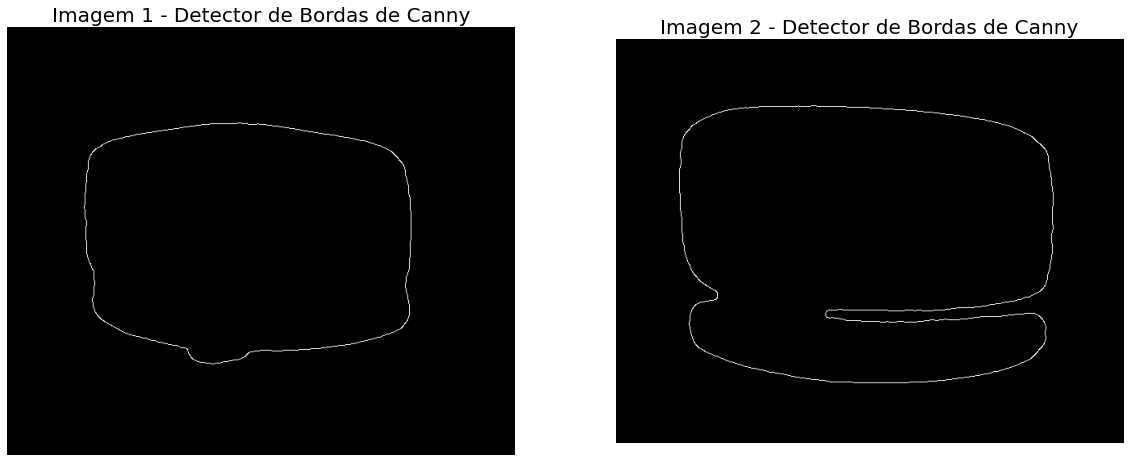

In [189]:
#Canny Edge Detection to the image
minVal = 15
maxVal = 30

edges1 = cv2.Canny(erode1,minVal,maxVal)
edges2 = cv2.Canny(erode2,minVal,maxVal)

fig1 = plt.figure(figsize=(20,10))

ax1 = fig1.add_subplot(121)
ax1.set_title('Imagem 1 - Detector de Bordas de Canny', size=20)
ax1.axis("off")
ax1.imshow(edges1,cmap=(plt.cm.gray))

ax2 = fig1.add_subplot(122)
ax2.set_title('Imagem 2 - Detector de Bordas de Canny', size=20)
ax2.axis("off")
ax2.imshow(edges2,cmap=(plt.cm.gray))

plt.show()

## Transformada de Hough

lines	=	cv.HoughLinesP(	image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]	)

- dst: Output of the edge detector. It should be a grayscale image (although in fact it is a binary one)
- lines: A vector that will store the parameters (xstart,ystart,xend,yend) of the detected lines
- rho : The resolution of the parameter r in pixels. We use 1 pixel.
- theta: The resolution of the parameter θ in radians. We use 1 degree (CV_PI/180)
- threshold: The minimum number of intersections to "*detect*" a line
- minLineLength: The minimum number of points that can form a line. Lines with less than this number of points are disregarded.
- maxLineGap: The maximum gap between two points to be considered in the same line.



In [185]:
print ("Altura (Imagem 1): %d pixels;" % (edges1.shape[0]))
print ("Largura (Imagem 1): %d pixels:" % (edges1.shape[1]))

print ("Altura (Imagem 2): %d pixels;" % (edges2.shape[0]))
print ("Largura (Imagem 2): %d pixels:" % (edges2.shape[1]))

Altura (Imagem 1): 529 pixels;
Largura (Imagem 1): 628 pixels:
Altura (Imagem 2): 500 pixels;
Largura (Imagem 2): 628 pixels:


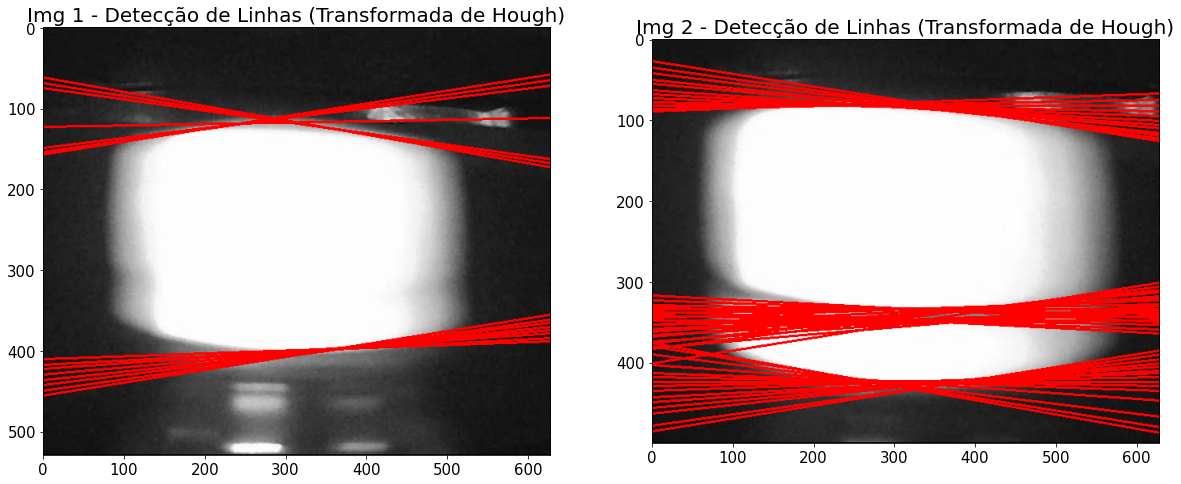

In [186]:

larguraIMG1 = edges1.shape[1]
larguraIMG2 = edges2.shape[1]

centerline1 = []
centerline2 = []

imgLines1 = cropped1.copy()
imgLines2 = cropped2.copy()

imgLines1 = cv2.cvtColor(imgLines1,cv2.COLOR_GRAY2BGR)
imgLines2 = cv2.cvtColor(imgLines2,cv2.COLOR_GRAY2BGR)

lines1 = cv2.HoughLines(edges1, 1, np.pi/180, 45)
lines2 = cv2.HoughLines(edges2, 1, np.pi/180, 45)

for i in range(len(lines1)):
    rho,theta = lines1[i][0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    try:
        m = (y2-y1)/(x2-x1)
        
    except:
        m = 0
    
    if m != 0:
        n = y1 - m*x1
        
        xa = 0
        ya = int(m*xa + n)
        xb = larguraIMG1
        yb = int(m*xb + n)
        xc = larguraIMG1/2
        yc = int(m*xc + n) 
    
        if (np.rad2deg(theta) > 80)  and  (np.rad2deg(theta) < 100):
            cv2.line(imgLines1,(xa,ya),(xb,yb),(0,0,255),2)
            centerline1.append(yc)
                    
        
for j in range(len(lines2)):
    rho,theta = lines2[j][0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    try:
        m = (y2-y1)/(x2-x1)
    except:
        m = 0
    
    if m != 0:
        n = y1 - m*x1
        
        xa = 0
        ya = int(m*xa + n)
        xb = larguraIMG1
        yb = int(m*xb + n)
        xc = int(larguraIMG1/2)
        yc = int(m*xc + n) 
    
        if (np.rad2deg(theta) > 80)  and  (np.rad2deg(theta) < 100):
            cv2.line(imgLines2,(xa,ya),(xb,yb),(0,0,255),2)
            centerline2.append(yc)
            



fig1 = plt.figure(figsize=(20,10))

ax1 = fig1.add_subplot(121)
ax1.set_title('Img 1 - Detecção de Linhas (Transformada de Hough)', size=20)
ax1.imshow(cv2.cvtColor(imgLines1, cv2.COLOR_BGR2RGB))

ax2 = fig1.add_subplot(122)
ax2.set_title('Img 2 - Detecção de Linhas (Transformada de Hough)', size=20)
ax2.imshow(cv2.cvtColor(imgLines2, cv2.COLOR_BGR2RGB))


plt.show()

In [142]:
h = edges1.shape[0]

limitesup = int(h*0.3)
limiteinf = int(h*0.08)

min1 = min(centerline1)
max1 = max(centerline1)

print('limitesup: ' + str(limitesup))
print('limiteinf: ' + str(limiteinf))

print(min1)
print(max1)
print("_________")

defeito = False

for i in centerline2:
    print (i)
    if (i > min1 + limitesup) and (i < max1 - limiteinf):
        defeito = True
    
        
print (defeito)     

limitesup: 158
limiteinf: 42
108
406
_________
118
119
341
340
335
343
416
118
335
350
118
351
341
351
117
351
349
416
114
116
350
336
335
342
339
338
351
117
116
112
118
352
354
415
338
353
418
416
419
415
336
345
417
336
334
417
354
358
421
357
109
349
348
True
